# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Train_data_agm.csv')

In [3]:
x = dataset.iloc[:, :20].values
y_real = dataset.iloc[:, -2].values
y_class = dataset.iloc[:, -1].values

In [24]:
dataset.describe()

,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,MRRTF,LULC,...,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R,grid_code,well_M
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,...,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,15.371678,3.065349,299.495682,3.168101,1.817620,0.540312,0.529664,4.328115,2.870674,2.682955,...,0.005404,1.010695,88.867481,0.040774,7.829934,0.035829,2.029773,3.877727,3.257841,2.210227
std,11.116370,2.029857,79.810166,1.843567,0.819711,0.535954,0.377463,2.212529,2.120788,0.982308,...,0.044890,0.747442,136.894210,0.035051,1.094868,1.395012,0.554200,0.695227,4.420200,1.156196
min,0.084850,0.000000,131.000000,0.096070,0.381920,0.030010,0.000000,0.000000,0.000000,1.000000,...,-0.266670,0.000000,0.000000,0.000000,4.917240,-6.297300,1.000000,1.000000,0.020000,1.000000
25%,5.391325,1.328830,231.000000,2.035155,1.195585,0.234363,0.225397,2.680390,0.515553,2.000000,...,-0.008445,0.632460,23.763597,0.016670,7.201628,-0.864860,2.000000,4.000000,0.740000,1.000000
50%,14.257625,2.954505,310.000000,2.750850,1.688770,0.452635,0.463935,4.804125,2.960480,2.000000,...,0.000000,0.894430,56.133205,0.037250,7.595675,-0.189190,2.000000,4.000000,1.470000,2.000000
75%,22.214573,4.566290,370.000000,4.028485,2.229880,0.693763,0.751048,6.266105,4.754570,3.000000,...,0.017890,1.341640,107.539073,0.052660,8.110140,0.810810,2.000000,4.000000,4.437500,3.000000
max,50.678840,8.212820,517.000000,14.400130,4.706010,7.189150,1.748140,7.778840,6.601090,5.000000,...,0.666670,8.402380,3301.999020,0.412390,11.444970,13.567570,4.000000,5.000000,20.000000,4.000000


1    1700
2     950
3     875
4     875
Name: well_M, dtype: int64


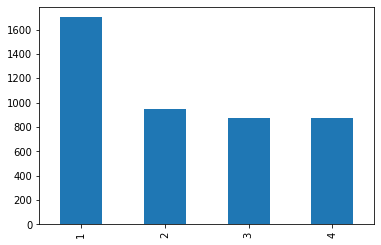

In [28]:
print(pd.value_counts(dataset['well_M']))
pd.value_counts(dataset['well_M']).plot.bar()

## Encoding categorical data

### Encoding the Independent Variable

In [233]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9,18,19])], remainder='passthrough')
x_dummy = np.array(ct.fit_transform(x))

C:\Users\Bihari\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Encoding the Dependent Variable

In [235]:
#no need

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.3,)

 # Feature Scaling


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train[:,15:] = sc.fit_transform(x_train[:,15:])
x_test[:,15:] = sc.transform(x_test[:,15:])

# LDA

In [284]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 6, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

# Training Random Forest classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

C:\Users\Bihari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## components vs accuracy

acc = []
for i in range(2,10):
    from sklearn.decomposition import KernelPCA
    kpca = KernelPCA(n_components = i, kernel = 'rbf')
    x_train = kpca.fit_transform(x_train)
    x_test = kpca.transform(x_test)
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators=10,random_state=0)
    classifier.fit(x_train, y_train)
    from sklearn.metrics import accuracy_score
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.plot(range(2,16),acc)
plt.title('accuracy vs no of components')
plt.xlabel('no of components')
plt.ylabel('Accuracy')
plt.show()

# Predicting Test Result

In [12]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [1 1]
 [1 1]
 ...
 [1 1]
 [4 4]
 [3 3]]


# Evaluating accuracy

from sklearn.metrics import r2_score, mean_squared_error
print('R squared error = {} '.format(r2_score(y_test, y_pred)))
print('RMSE: = {}'.format(mean_squared_error(y_test, y_pred)))

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[523   0   0   0]
 [  1 269   0   0]
 [  0   3 254   0]
 [  2   1   0 267]]


0.9946969696969697

# predicting unlabled data

In [29]:
unlabeled = pd.read_csv('Data_unlabeled.csv')

x_unl = unlabeled.iloc[: , 2:].values
x_coordinates = unlabeled.iloc[:,:2]
unlabeled.head(10)

,x,y,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,...,SCA,Profile_C,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R
0,258143.343169,2.664110e+06,12.36240,8.60310,541.0,4.33529,0.16722,1.75086,0.0,0.16393,...,17.57359,-0.00098,-0.00084,2.48998,256.40796,0.12944,6.25581,0.64865,2.0,2.0
1,258233.343169,2.664110e+06,12.27924,8.59698,536.0,4.33185,0.16012,0.47551,0.0,1.84461,...,40.00359,-0.00244,-0.02385,1.00000,141.52002,0.03725,7.06296,-1.02703,2.0,2.0
2,258323.343169,2.664110e+06,12.19617,8.59179,535.0,4.32848,0.14855,0.90309,0.0,0.91355,...,36.81416,0.00071,0.00571,1.34164,225.42549,0.06861,7.31022,0.54054,2.0,2.0
3,258413.343169,2.664110e+06,12.11320,8.58755,536.0,4.32518,0.14352,1.06532,0.0,0.36503,...,17.57359,0.00220,0.01238,1.84391,113.97736,0.08951,6.68820,2.24324,2.0,2.0
4,258503.343169,2.664110e+06,12.03034,8.58425,537.0,4.32195,0.13879,0.44645,0.0,0.06206,...,22.16388,0.00089,0.00596,0.77460,36.82467,0.03725,7.46354,1.97297,4.0,2.0
5,258593.343169,2.664110e+06,11.94757,8.58189,530.0,4.31879,0.13477,1.07262,0.0,1.78328,...,45.05311,-0.00603,-0.07360,3.13050,483.79874,0.08314,6.73362,-4.02703,4.0,2.0
6,258683.343169,2.664110e+06,11.86491,8.58047,534.0,4.31569,0.13070,0.69362,0.0,0.05827,...,17.57359,0.00170,0.02702,1.34164,61.00688,0.06002,6.92963,1.56757,4.0,2.0
7,258773.343169,2.664110e+06,11.78236,8.58000,532.0,4.31266,0.12659,0.92361,0.0,0.97943,...,41.95362,-0.00221,-0.00000,1.41421,115.40007,0.06657,6.74746,-0.59459,4.0,2.0
8,258143.343169,2.664200e+06,12.32839,8.51334,535.0,4.32580,0.17574,1.00166,0.0,0.84130,...,187.56355,0.00227,-0.01712,1.48324,521.14337,0.06861,6.75585,0.35135,2.0,2.0
9,258233.343169,2.664200e+06,12.24500,8.50716,534.0,4.32241,0.17108,1.20406,0.0,0.33484,...,85.83942,0.00182,0.00387,1.89737,212.62872,0.09688,6.78160,2.32432,2.0,2.0


In [21]:
print(x_unl[0])

[ 1.24e+01  8.60e+00  5.41e+02  4.34e+00  1.67e-01  1.75e+00  0.00e+00
  1.64e-01  2.06e-01  4.00e+00  1.76e+01 -9.80e-04 -8.40e-04  2.49e+00
  2.56e+02  1.29e-01  6.26e+00  6.49e-01  2.00e+00  2.00e+00]


In [23]:
label = classifier.predict(x_unl)
print(label[0])

1


In [30]:
x_coordinates.head()

,x,y
0,258143.343169,2.664110e+06
1,258233.343169,2.664110e+06
2,258323.343169,2.664110e+06
3,258413.343169,2.664110e+06
4,258503.343169,2.664110e+06


In [31]:
x_coordinates['well_class'] = label

x_coordinates.head()

C:\Users\Bihari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,x,y,well_class
0,258143.343169,2.664110e+06,1
1,258233.343169,2.664110e+06,1
2,258323.343169,2.664110e+06,1
3,258413.343169,2.664110e+06,1
4,258503.343169,2.664110e+06,1


1    1380047
2     264291
3     210320
4     195965
Name: well_class, dtype: int64


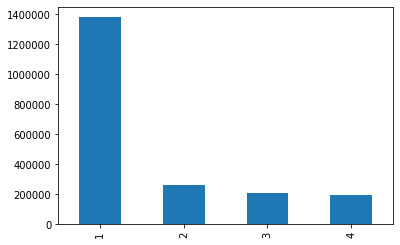

In [34]:
print(pd.value_counts(x_coordinates['well_class']))
pd.value_counts(x_coordinates['well_class']).plot.bar()

In [32]:
#exporting the data
x_coordinates.to_csv('prediction.csv')

# Grid search

In [287]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': list(np.arange(1,100)), 'criterion': ['gini','entrophy'], 'min_samples_split': list(np.arange(1,100)),
               'random_state': list(np.arange(1,100)), 'max_depth': list(np.arange(1,50)), 'min_samples_leaf':list(np.arange(1,30))}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

MemoryError: 

In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = x_train , y = y_train, cv = 10)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 99.51 %
Standard Deviation: 0.30 %


In [278]:
list(np.arange(1,5))

[1, 2, 3, 4]